In [26]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import random
import csv
import os
from math import sqrt
from collections import Counter
import random
style.use("fivethirtyeight")

In [10]:
def Euclidean_Distance(pt1,pt2):
    dist=np.sqrt(np.sum([(x-y)**2 for x,y in zip(pt1,pt2)]))
    return dist

In [11]:
#Test your function on two points
point1=[1,3]
point2=[2,5]
Euclidean_Distance(point1,point2)

2.23606797749979

In [12]:
dataset={"k":[[1,2],[2,3],[3,1]],"r":[[6,5],[7,7],[8,6]]}
#We have two classes and their features(point_visually)
new_features=[5,7]

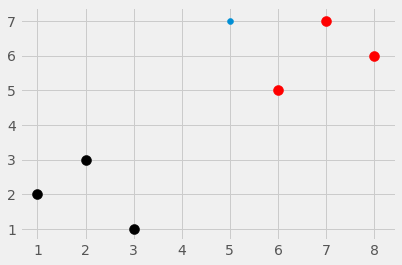

In [13]:
for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0],j[1],s=100,color=i)
plt.scatter(new_features[0],new_features[1])

In [15]:
def knn(data,predict,k=3):
    if len(data)>=k:
        warnings.warn("K is set to a value less than total voting group")
    #knnalgos
    distances=[]
    for group in data:
        for features in data[group]:
            euc_dist=np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euc_dist,group])
    votes=[i[1] for i in sorted(distances)[:k]]
    vote_result=Counter(votes).most_common(1)[0][0]
    
    return vote_result

In [25]:
word_list=['Jellicle', 'Cats', 'are', 'black', 'and', 'white,', 'Jellicle', 'Cats', 
 'are', 'rather', 'small;', 'Jellicle', 'Cats', 'are', 'merry', 'and', 
 'bright,', 'And', 'pleasant', 'to', 'hear', 'when', 'they', 'caterwaul.', 
 'Jellicle', 'Cats', 'have', 'cheerful', 'faces,', 'Jellicle', 'Cats', 
 'have', 'bright', 'black', 'eyes;', 'They', 'like', 'to', 'practise', 
 'their', 'airs', 'and', 'graces', 'And', 'wait', 'for', 'the', 'Jellicle', 
 'Moon', 'to', 'rise.', ''] 

from collections import Counter
c = Counter(word_list)
c.most_common(1)[0][1]

6

In [29]:
df=pd.read_csv("data.csv")
df.replace("?",-99999,inplace=True)
df.replace("M",4,inplace=True)
df.replace("?",2,inplace=True)

df.drop(["id"],1,inplace=True)
full_data=df.astype(float).values.tolist()
random.shuffle(full_data)

test_size=0.2
train_set={2:{},4:{}}
test_set={2:{},4:{}}
train_data=full_data[:-int(test_size*len(full_data))]
test_data=full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[0]].append(i[0:])
for i in test_data:
    test_set[i[0]].append(i[0:])

    
correct=0
total=0

for group in test_set:
    for data in test_set[group]:
        vote=knn(train_set,data,k=5)
        if group==vote:
            correct+=1
        total+=1
print("Accuracy:",correct/total)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
